In [1]:
import pandas as pd

data=[['youth','high','no','fair','no'],
['youth','high','no','excellent','no'],
['middle_age','high','no','fair','yes'],
['senior','medium','no','fair','yes'],
['senior','low','yes','fair','yes'],
['senior','low','yes','excellent','no'],
['middle_age','low','yes','excellent','yes'],
['youth','medium','no','fair','no'],
['youth','low','yes','fair','yes'],
['senior','medium','yes','fair','yes'],
['youth','medium','yes','excellent','yes'],
['middle_age','medium','no','excellent','yes'],
['middle_age','high','yes','fair','yes'],
['senior','medium','no','excellent','no'],
]

data=pd.DataFrame(data,columns=['age','income','student','credit_rating','buy_computers'])
data

,age,income,student,credit_rating,buy_computers
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing

# 对于文字型特征如何处理，这时就需要用LabelEncoder（标签编码）和One—Hot（独热编码）将其转换为相应的数字型特征，再进行相应的处理。
# Tree Model不太需要one-hot编码： 对于决策树来说，one-hot的本质是增加树的深度。
# 这里仍然使用ordinalencoder
enc = preprocessing.OrdinalEncoder()
enc.fit(data)
x=enc.transform(data)

X_train=x[:,0:4]
y_train=x[:,4]


In [3]:
from sklearn.tree import DecisionTreeClassifier

# 创建决策时分类器--ID3算法
tree_model=DecisionTreeClassifier(criterion="entropy")
# 可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。

# 喂入数据
tree_model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

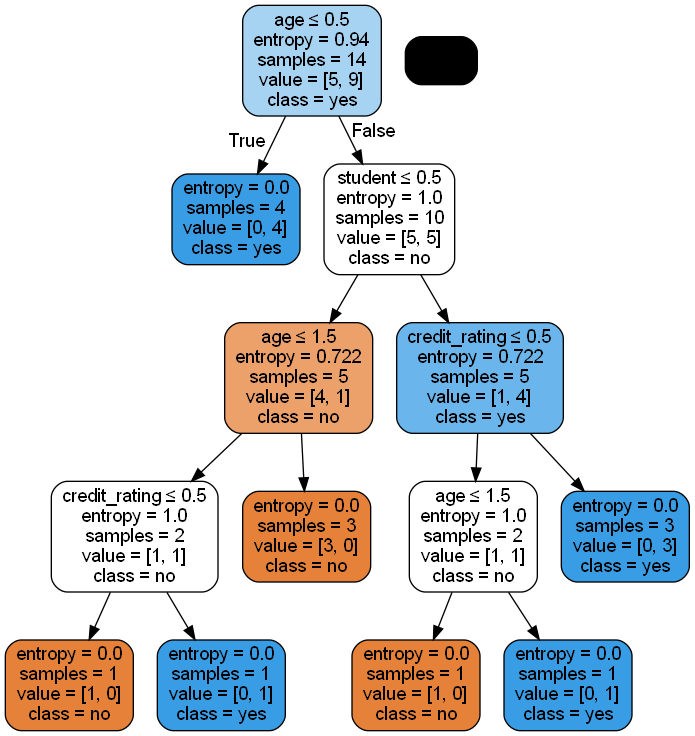

In [5]:
# 可视化
from IPython.display import Image  
from sklearn import tree
import pydotplus 
 
 
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                        feature_names=['age','income','student','credit_rating'],
                        class_names=['no','yes'],  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

决策树虽然也是基于频率统计的，相比朴素贝叶斯的一个显著优点就是，决策树能同时接收类别型和数值型变量作为特征。但是决策树容易过拟合，且对数值型变量的值不太敏感。比方说上述例子，用决策树进行预测时，一个预测样本的年收入79K，就会被纳入<80k的范畴，而不考虑79K和80K的接近程度。

